
Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -0.78
- El intercepto del modelo es: 21.73

Interpretación del comportamiento:
- Los frameworks más populares tienden a tener un mayor porcentaje de uso.
- A medida que descendemos en el ranking de popularidad, los porcentajes de uso disminuyen.
- El modelo muestra una relación negativa, lo que indica que a medida que el ranking disminuye (menos popularidad), el porcentaje de uso también disminuye.
- Esto sugiere que la popularidad de un framework está correlacionada con su uso en la comunidad y, por ende, con la demanda en el mercado.


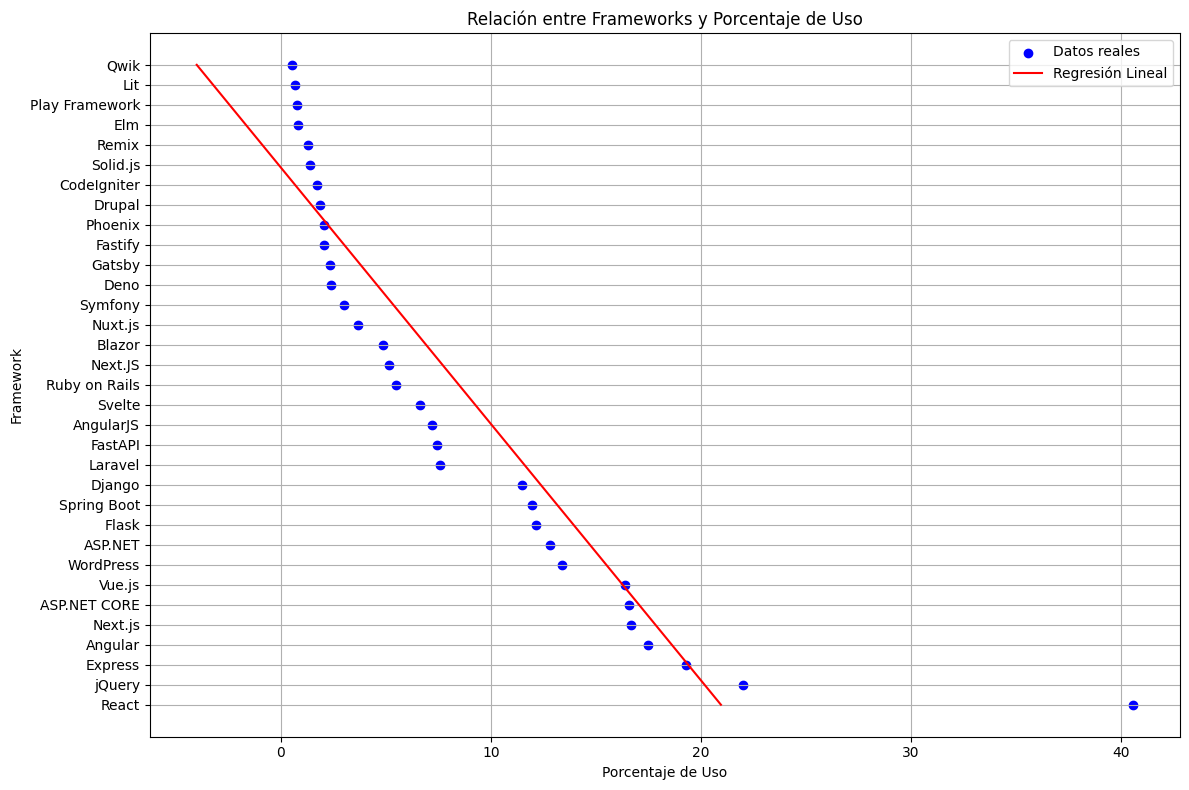

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV
archivo_csv = "Frameworks.csv"  # Cambia esto a la ruta de tu archivo real
df = pd.read_csv(archivo_csv)

# Limpiar los datos de la columna "Porcentaje" (remover '%')
df['Porcentaje'] = df['Porcentaje'].str.rstrip('%').astype(float)

# Ordenar por porcentaje y resetear el índice
df = df.sort_values(by="Porcentaje", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values  # Variable independiente (Ranking)
y = df["Porcentaje"].values  # Variable dependiente (Porcentaje de uso)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo y generar un análisis textual
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis del modelo
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print("- Los frameworks más populares tienden a tener un mayor porcentaje de uso.")
print("- A medida que descendemos en el ranking de popularidad, los porcentajes de uso disminuyen.")
print("- El modelo muestra una relación negativa, lo que indica que a medida que el ranking disminuye (menos popularidad), el porcentaje de uso también disminuye.")
print("- Esto sugiere que la popularidad de un framework está correlacionada con su uso en la comunidad y, por ende, con la demanda en el mercado.")

# Configurar el gráfico con los nombres de los frameworks en el eje y
plt.figure(figsize=(12, 8))
plt.scatter(df["Porcentaje"], df["Tecnología"], color="blue", label="Datos reales")
plt.plot(y_pred, df["Tecnología"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Porcentaje de Uso")
plt.ylabel("Framework")
plt.title("Relación entre Frameworks y Porcentaje de Uso")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
